Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0606 - val_loss: 0.0198
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0169 - val_loss: 0.0105
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0099 - val_loss: 0.0080
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0074 - val_loss: 0.0063
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0061 - val_loss: 0.0055
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 

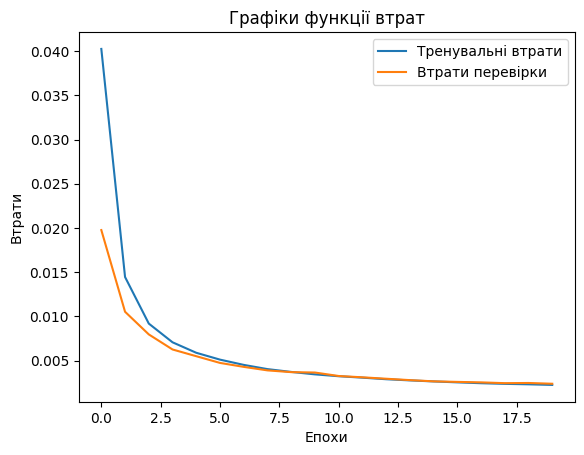

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


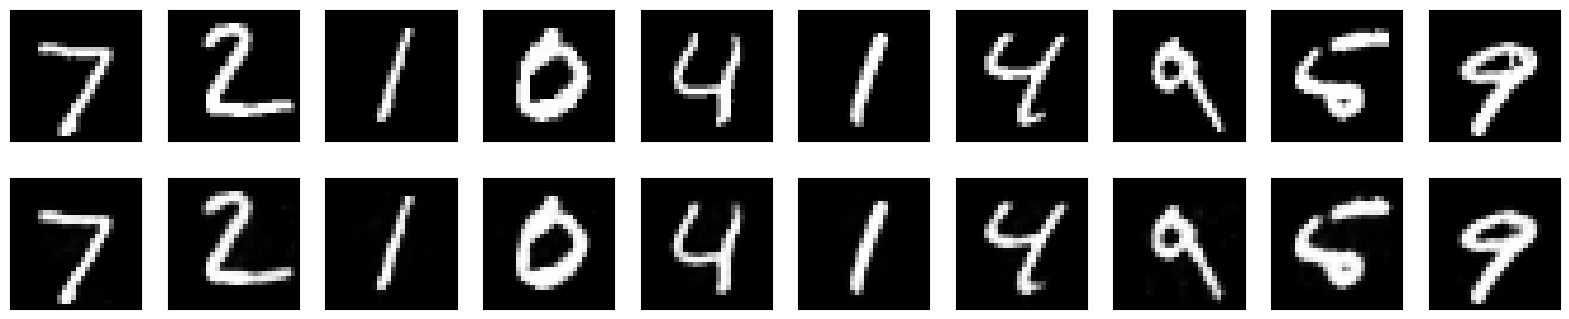

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist 
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

input_img = Input(shape=(28, 28, 1))

# Енкодер
x = Flatten()(input_img)
x = Dense(512, activation='tanh')(x)
x = Dense(256, activation='tanh')(x)
encoded = Dense(128, activation='tanh')(x)

# Декодер
x = Dense(256, activation='tanh')(encoded)
x = Dense(512, activation='tanh')(x)
decoded = Dense(28*28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

history = autoencoder.fit(x_train, x_train, 
                          epochs=20, 
                          batch_size=128, 
                          shuffle=True, 
                          validation_data=(x_test, x_test))

plt.plot(history.history['loss'], label='Тренувальні втрати')
plt.plot(history.history['val_loss'], label='Втрати перевірки')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.title('Графіки функції втрат')
plt.show()

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
